In [1]:
# Step 1: Install Kaggle CLI
!pip install -q kaggle


In [2]:
# Step 2: Upload Kaggle API Key
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Make sure kaggle.json is in the root of your Google Drive or adjust the path below
kaggle_json_path = '/content/drive/MyDrive/Colab Notebooks/5511/Week_3/kaggle.json'

# Create a kaggle folder in the root directory and copy the kaggle.json file there
!mkdir -p ~/.kaggle
!cp "{kaggle_json_path}" ~/.kaggle/

# Provide the necessary permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json


Mounted at /content/drive


In [3]:
# Step 3: Download the Dataset
COMPETITION_NAME = 'nlp-getting-started'

# Create a data folder in the current directory
!mkdir data

# Download the dataset to the data folder
!kaggle competitions download -c {COMPETITION_NAME} -p data


  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 73.7MB/s]


In [4]:
# Step 4: Unzip the Dataset
!unzip -o -q "data/*.zip" -d data


In [5]:
# Step 5: Import the Data into Pandas DataFrame
import pandas as pd

# Load the data into a pandas DataFrame
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Display the first few rows of the DataFrame
print(train_df.head())


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test_df.info

<bound method DataFrame.info of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
326

In [9]:
train_df['target'].value_counts()



0    4342
1    3271
Name: target, dtype: int64

In [10]:
### 1. Basic Analysis
# Print the first few rows of the DataFrame.
print(train_df.head())

# Print the summary of the DataFrame.
print(train_df.info())

# Print the summary statistics of the DataFrame.
print(train_df.describe())

# Print the number of missing values in each column.
print(train_df.isnull().sum())


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
coun

In [11]:
### 2. Check for Missing Values

# Print the number of missing values in each column.
print(train_df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


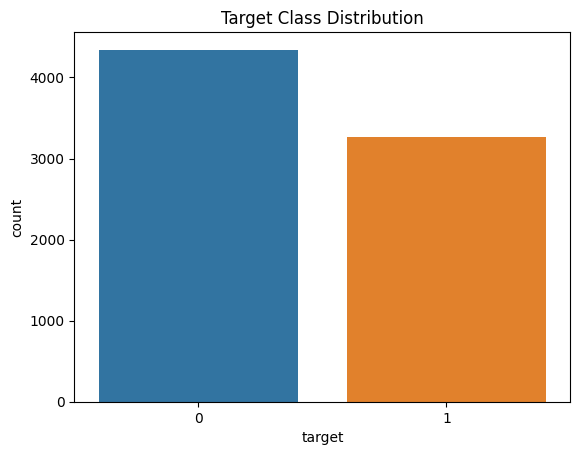

In [12]:
### 3. Visualizing the Data Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for the target classes.
sns.countplot(x='target', data=train_df)
plt.title('Target Class Distribution')
plt.show()

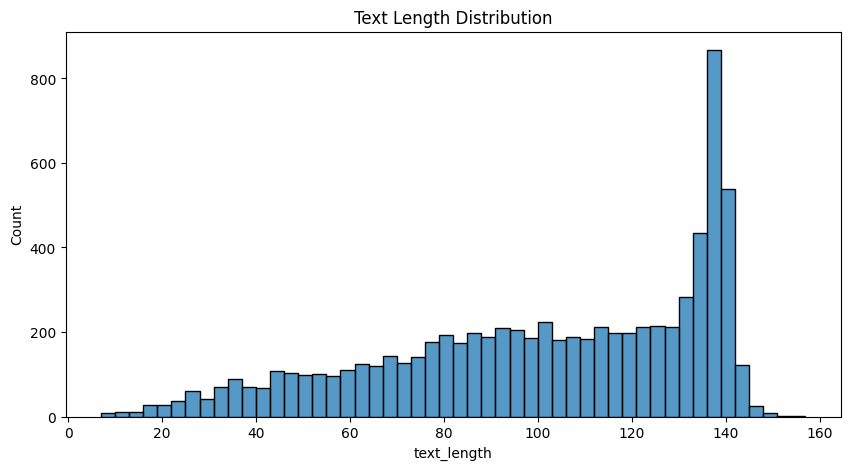

In [13]:
### 4. Text Length Distribution

# Create a new column for text length.
train_df['text_length'] = train_df['text'].apply(len)

# Plot the text length distribution.
plt.figure(figsize=(10, 5))
sns.histplot(train_df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.show()

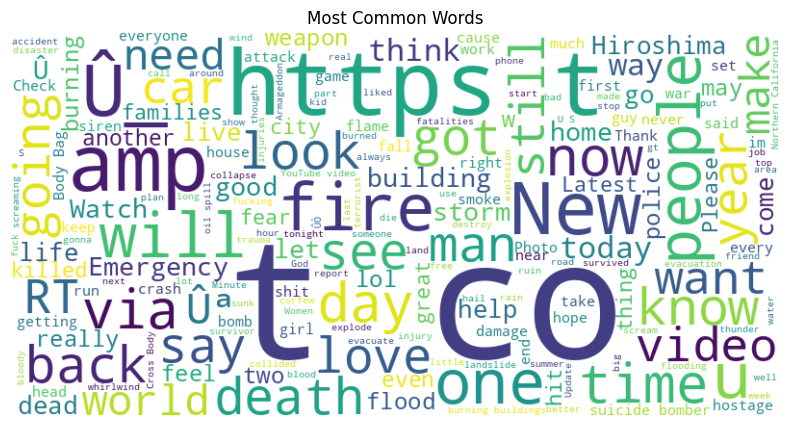

In [14]:
### 5. Most Common Words

from wordcloud import WordCloud

# Combine all the text data.
text = ' '.join(train_df['text'])

# Create a WordCloud object.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()

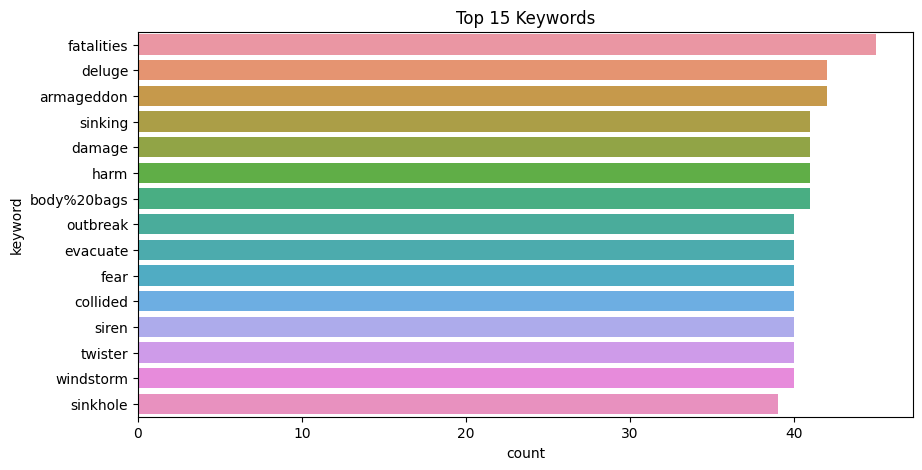

In [15]:
### 6. Explore Keywords

plt.figure(figsize=(10, 5))
sns.countplot(y='keyword', data=train_df, order=train_df['keyword'].value_counts().iloc[:15].index)
plt.title('Top 15 Keywords')
plt.show()

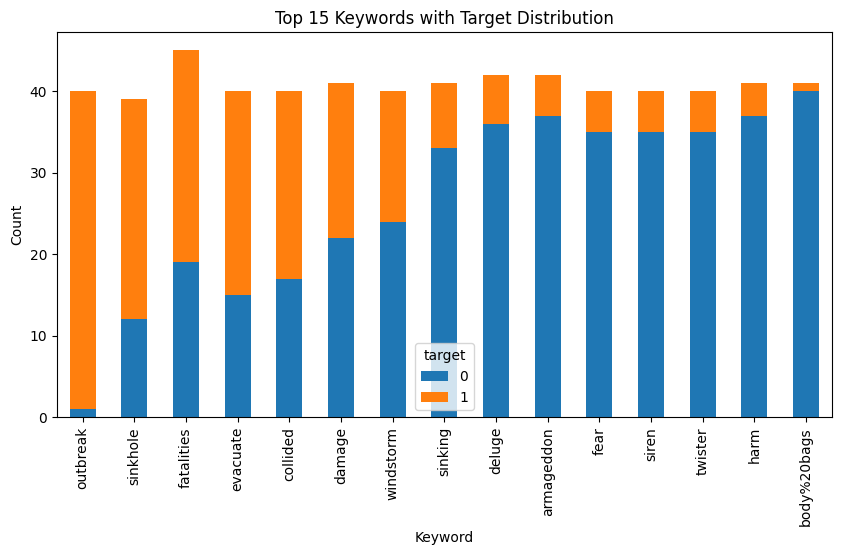

In [16]:
### 7. Relationship Between Keywords and Target

# Top keywords for each target class
top_keywords = train_df.groupby(['keyword', 'target']).size().unstack().fillna(0)
top_keywords['total'] = top_keywords.sum(axis=1)
top_keywords = top_keywords.sort_values('total', ascending=False).head(15)
top_keywords.drop(columns='total', inplace=True)

# Plot top keywords for each target class
top_keywords.sort_values(1, ascending=False).plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Top 15 Keywords with Target Distribution')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.show()



# Model

In [35]:
#!pip install scikit-learn
#!pip install keras
#!pip install tensorflow
#!pip install scikeras
#!pip install tensorflow-addons

In [28]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [40]:
### 1. Creating an NLP Model for Classification using TensorFlow


# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])
sequences = tokenizer.texts_to_sequences(train_df['text'])
padded_sequences = pad_sequences(sequences, padding='post')

# Split data into training and testing
x_train = padded_sequences[:6000]
x_test = padded_sequences[6000:]
y_train = train_df['target'][:6000]
y_test = train_df['target'][6000:]

# Building the model
model = tf.keras.Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=padded_sequences.shape[1]),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
188/188 [==============================] - 2s 5ms/step - loss: 0.6607 - accuracy: 0.5913 - val_loss: 0.6280 - val_accuracy: 0.6404
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.5339 - accuracy: 0.7638 - val_loss: 0.5148 - val_accuracy: 0.7712
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8327 - val_loss: 0.4716 - val_accuracy: 0.7967
Epoch 4/5
188/188 [==============================] - 1s 5ms/step - loss: 0.3499 - accuracy: 0.8612 - val_loss: 0.4566 - val_accuracy: 0.8041
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3071 - accuracy: 0.8808 - val_loss: 0.4597 - val_accuracy: 0.7960


In [55]:
### 2. Hyperparameter Tuning

def build_model(optimizer='adam'):
    model = tf.keras.Sequential([
        Embedding(input_dim=5000, output_dim=16, input_length=padded_sequences.shape[1]),
        GlobalAveragePooling1D(),
        Dense(24, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_model)
params = {'epochs': [5, 10], 'optimizer': ['adam', 'sgd']}
random_search = RandomizedSearchCV(model, param_distributions=params, cv=3)
result = random_search.fit(x_train, y_train)

best_params = result.best_params_


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 4ms/step - loss: 0.6747 - accuracy: 0.5792
Epoch 2/5
125/125 [==============================] - 0s 4ms/step - loss: 0.6006 - accuracy: 0.6845
Epoch 3/5
125/125 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.7983
Epoch 4/5
125/125 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8530
Epoch 5/5
63/63 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 2s 5ms/step - loss: 0.6745 - accuracy: 0.5805
Epoch 2/5
125/125 [==============================] - 1s 5ms/step - loss: 0.6205 - accuracy: 0.6420
Epoch 3/5
125/125 [==============================] - 1s 5ms/step - loss: 0.5246 - accuracy: 0.7822
Epoch 4/5
125/125 [==============================] - 1s 5ms/step - loss: 0.4263 - accuracy: 0.8372
Epoch 5/5
63/63 [==============================] - 0s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 4ms/step - loss: 0.6753 - accuracy: 0.5803
Epoch 2/5
125/125 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6618
Epoch 3/5
125/125 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7860
Epoch 4/5
125/125 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8400
Epoch 5/5
63/63 [==============================] - 0s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 3ms/step - loss: 0.6755 - accuracy: 0.5798
Epoch 2/5
125/125 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6808
Epoch 3/5
125/125 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7920
Epoch 4/5
125/125 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8415
Epoch 5/5
63/63 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 4ms/step - loss: 0.6787 - accuracy: 0.5785
Epoch 2/5
125/125 [==============================] - 1s 5ms/step - loss: 0.6215 - accuracy: 0.6530
Epoch 3/5
125/125 [==============================] - 1s 5ms/step - loss: 0.4963 - accuracy: 0.7968
Epoch 4/5
125/125 [==============================] - 1s 5ms/step - loss: 0.3955 - accuracy: 0.8457
Epoch 5/5
63/63 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 3ms/step - loss: 0.6782 - accuracy: 0.5767
Epoch 2/5
125/125 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.6560
Epoch 3/5
125/125 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7915
Epoch 4/5
125/125 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8430
Epoch 5/5
63/63 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.5803
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.6945
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7983
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8462
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8720
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8873
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2654 - accuracy: 0.9010
Epoch 8/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9128
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.9212
Epoch 10/10
63/63 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 2s 5ms/step - loss: 0.6729 - accuracy: 0.5822
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6020 - accuracy: 0.6952
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4921 - accuracy: 0.8027
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3960 - accuracy: 0.8487
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3383 - accuracy: 0.8737
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.8915
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9060
Epoch 8/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9168
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9240
Epoch 10/10
63/63 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 3ms/step - loss: 0.6767 - accuracy: 0.5805
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.6405
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7788
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8315
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8640
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8802
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 0.8940
Epoch 8/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.9115
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9208
Epoch 10/10
63/63 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 2s 4ms/step - loss: 0.6750 - accuracy: 0.5805
Epoch 2/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.6815
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 0.4906 - accuracy: 0.7950
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4024 - accuracy: 0.8420
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3433 - accuracy: 0.8710
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3018 - accuracy: 0.8830
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2704 - accuracy: 0.8960
Epoch 8/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2445 - accuracy: 0.9097
Epoch 9/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2207 - accuracy: 0.9202
Epoch 10/10
63/63 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 3ms/step - loss: 0.6753 - accuracy: 0.5805
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6862
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.8083
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8525
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8763
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8988
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9080
Epoch 8/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9202
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9262
Epoch 10/10
63/63 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


125/125 [==============================] - 1s 3ms/step - loss: 0.6746 - accuracy: 0.5805
Epoch 2/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6170 - accuracy: 0.6572
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7885
Epoch 4/10
125/125 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.8430
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8695
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.8905
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.9080
Epoch 8/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9202
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9320
Epoch 10/10
63/63 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
188/188 [==============================] - 2s 5ms/step - loss: 0.6661 - accuracy: 0.5832
Epoch 2/5
188/188 [==============================] - 1s 5ms/step - loss: 0.5432 - accuracy: 0.7595
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8267
Epoch 4/5
188/188 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8617
Epoch 5/5
188/188 [==============================] - 1s 3ms/step - loss: 0.3102 - accuracy: 0.8800


In [56]:
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'optimizer': 'adam', 'epochs': 5}


In [57]:
### 3. Save the Best Model

# Assuming that best_model is the trained model with best hyperparameters


best_model = build_model(optimizer=best_params['optimizer'])
best_model.fit(x_train, y_train, epochs=best_params['epochs'])


Epoch 1/5
188/188 [==============================] - 1s 3ms/step - loss: 0.6669 - accuracy: 0.5868
Epoch 2/5
188/188 [==============================] - 1s 5ms/step - loss: 0.5542 - accuracy: 0.7410
Epoch 3/5
188/188 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.8257
Epoch 4/5
188/188 [==============================] - 1s 5ms/step - loss: 0.3537 - accuracy: 0.8575
Epoch 5/5
188/188 [==============================] - 1s 5ms/step - loss: 0.3133 - accuracy: 0.8728


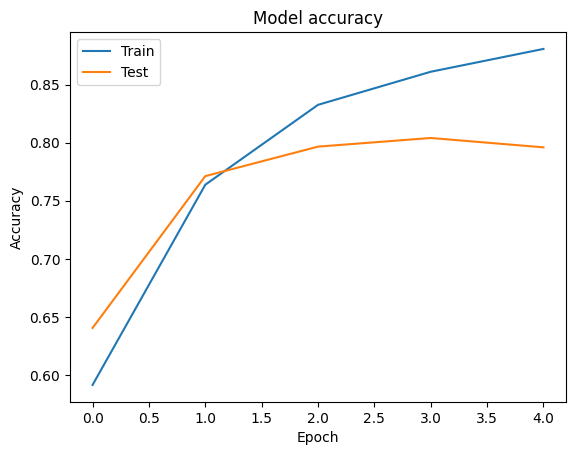

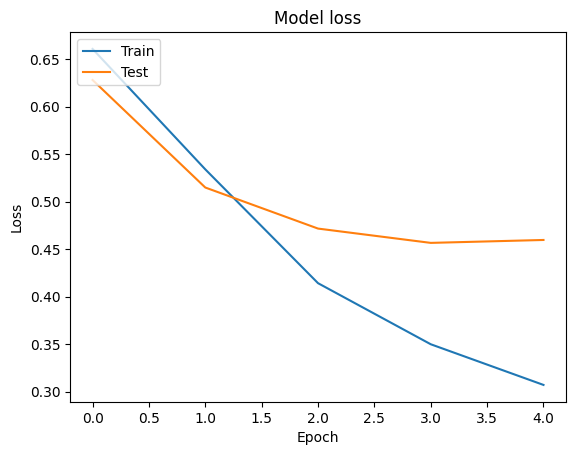

Best score: 0.7481666666666666
Best parameters: {'optimizer': 'adam', 'epochs': 5}


In [58]:
### 4. Generate Graphs and Metrics to Illustrate Performance


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Print the best model's performance
best_score = result.best_score_
best_params = result.best_params_
print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

# Kaggle

In [59]:
# 1. Predict the labels for the test dataset
predictions = best_model.predict(x_test)

51/51 [==============================] - 0s 2ms/step


In [62]:
# 2. Convert prediction to binary labels
binary_predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]


In [64]:
# 3. Create Submission
test_sequences = tokenizer.texts_to_sequences(test_df['text'])
test_padded_sequences = pad_sequences(test_sequences, padding='post', maxlen=padded_sequences.shape[1])
predictions = best_model.predict(test_padded_sequences)
binary_predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]

submission_df = pd.DataFrame({'id': test_df['id'], 'target': binary_predictions})


102/102 [==============================] - 1s 9ms/step


In [65]:
submission_df.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [66]:
# Save to csv
submission_df.to_csv('submission.csv', index=False)

In [68]:
from google.colab import files

# Save DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)

# Download the file to your local machine
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>